# MNIST Data Wrangling and Exploration
The purpose of this notebook is to adequately understand, describe, and explore the mnist data set that will be used in this project.

In [1]:
import os
while os.path.basename(os.getcwd()) != 'Synthetic_Data_GAN_Capstone':
    os.chdir('..')
from scripts.Utils.data_loading import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.utils as vutils
%matplotlib inline

In [205]:
def show_grid(img):
    im = vutils.make_grid(img)
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Training Images")
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    plt.show()

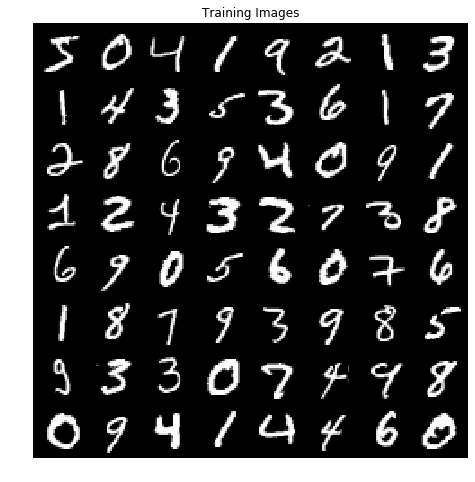

In [282]:
mnist = load_dataset('mnist')
images = mnist[0].data[:64].view(-1, 1, 28, 28).float()
images = images / 255
show_grid(images)

In [170]:
print("Train set is of length:",len(mnist[0]))
print("Test set is of length:",len(mnist[1]))
print("Each image is of size:",np.array(mnist[0][0][0]).shape)

Train set is of length: 60000
Test set is of length: 10000
Each image is of size: (28, 28)


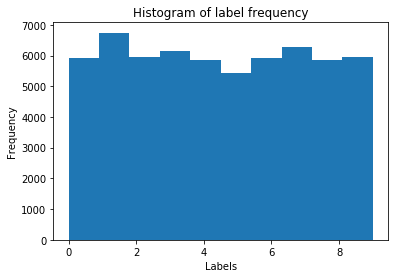

In [187]:
plt.hist(mnist[0].targets.numpy())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of label frequency')
plt.show()

Looks like we have labels 0-9, and we have a balanced number of each class.

Let's try a little bit of data augmentation with pytorch!

In [678]:
import torchvision.transforms as t
labels = mnist[0].targets[:64]
def trnsfm_batch(img, labels):
    PIL = torchvision.transforms.ToPILImage()
    TNSR = torchvision.transforms.ToTensor()
    crop_trnsfm = t.RandomResizedCrop(28, scale = (0.75, 1.0), ratio=(0.75, 1.3333))
    affine_trnsfm = t.RandomAffine((-15, 15))
    vert_trnsfm = t.RandomVerticalFlip(p=0.5)
    hor_trnsfm = t.RandomHorizontalFlip(p=0.5)
    final_trnsfm = t.Compose([crop_trnsfm, affine_trnsfm])
    spcl_trnsfm = t.Compose([vert_trnsfm, hor_trnsfm])
    spcl_list = [1, 8]
    out = torch.empty_like(img)
    for i in range(64):
        tmp = img[i].view(28, 28)
        tmp = PIL(tmp)
        tmp = final_trnsfm(tmp)
        if labels[i] in spcl_list:
            tmp = spcl_trnsfm(tmp)
        tmp = TNSR(tmp)
        out[i] = tmp
    return out

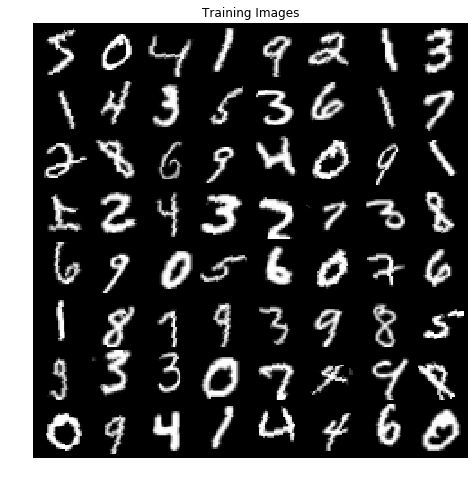

In [736]:
test = trnsfm_batch(images, labels)
show_grid(test)

It's easiest to see if you run it repeatedly and observe how they change. You can also try messing with the parameters of the transformations in the function!